In [6]:
import polars as pl

df = pl.read_csv("fuel poverty LSOA.csv")

df

LSOA 2011 Code,LSOA 2011 Name,LA Name,2012,2013,2014,2015,2016,2017
str,str,str,f64,f64,f64,f64,f64,f64
"""E01000001""","""City of London 001A""","""City of London""",5.8,3.4,9.1,4.1,4.3,4.2
"""E01000002""","""City of London 001B""","""City of London""",6.4,1.5,2.9,2.3,2.7,2.1
"""E01000003""","""City of London 001C""","""City of London""",5.9,4.6,6.3,7.1,6.1,5.5
"""E01000005""","""City of London 001E""","""City of London""",4.3,8.8,10.4,6.9,7.1,7.9
"""E01032739""","""City of London 001F""","""City of London""",3.4,3.2,3.4,4.7,4.7,16.7
…,…,…,…,…,…,…,…,…
"""E01033604""","""Westminster 009J""","""Westminster""",15.3,6.7,8.1,6.7,8.3,4.5
"""E01033605""","""Westminster 009K""","""Westminster""",10.4,5.6,6.0,3.9,6.1,4.4
"""E01033606""","""Westminster 014F""","""Westminster""",12.4,8.8,12.3,9.6,9.2,6.7


**Drop different columns**

In [24]:
df_only_2017 = df.drop(["2012", "2013", "2014", "2015", "2016", "LSOA 2011 Name", "LA Name" ])
codes_to_delete = [
    'E01015971', 'E01023839', 'E01023840', 'E01024153', 
    'E01024439', 'E01028671', 'E01030323', 'E01030565', 
    'E01030860', 'E01032624'
]

df_only_2017 = df_only_2017.filter(~df_only_2017["LSOA 2011 Code"].is_in(codes_to_delete))

df_only_2017

LSOA 2011 Code,2017
str,f64
"""E01000001""",4.2
"""E01000002""",2.1
"""E01000003""",5.5
"""E01000005""",7.9
"""E01032739""",16.7
…,…
"""E01033604""",4.5
"""E01033605""",4.4
"""E01033606""",6.7


In [25]:
df_epc = pl.read_csv("energy_efficiency_by_lsoa.csv")
df_epc

codes_to_delete = [
    'E01015971', 'E01023839', 'E01023840', 'E01024153', 
    'E01024439', 'E01028671', 'E01030323', 'E01030565', 
    'E01030860', 'E01032624'
]

df_modified = df_epc.filter(~df_epc["LSOA"].is_in(codes_to_delete))

df_modified

LSOA,Energy Efficiency
str,f64
"""E01000001""",57.87683
"""E01000002""",65.359492
"""E01000003""",61.372987
"""E01000005""",66.293588
"""E01000006""",60.40625
…,…
"""E01033742""",78.350775
"""E01033743""",72.664216
"""E01033744""",71.882136


In [26]:
df_merge = df_only_2017.with_columns(df_modified["Energy Efficiency"].alias("Energy Efficiency"))
df_merge

LSOA 2011 Code,2017,Energy Efficiency
str,f64,f64
"""E01000001""",4.2,57.87683
"""E01000002""",2.1,65.359492
"""E01000003""",5.5,61.372987
"""E01000005""",7.9,66.293588
"""E01032739""",16.7,60.40625
…,…,…
"""E01033604""",4.5,78.350775
"""E01033605""",4.4,72.664216
"""E01033606""",6.7,71.882136


In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

x = df_merge["2017"].to_numpy().reshape(-1, 1)  # X should be a 2D array
y = df_merge["Energy Efficiency"].to_numpy()  # y is a 1D array

# Perform linear regression using sklearn
model = LinearRegression()
model.fit(x, y)

# Print regression results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Use the model to make predictions
predictions = model.predict(x)
print("Predictions:", predictions)

model

correlation_matrix = np.corrcoef(df_merge["2017"].to_numpy(), df_merge["Energy Efficiency"].to_numpy())
pearson_coefficient = correlation_matrix[0, 1]
print("Pearson Correlation Coefficient (r):", pearson_coefficient)

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y, predictions)
print("R² (Coefficient of Determination):", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error (MSE):", mse)

Intercept: 65.99544413931255
Coefficient: -0.26082905664088846
Predictions: [64.8999621  65.44770312 64.56088433 ... 64.24788946 64.50871852
 62.99590999]
Pearson Correlation Coefficient (r): -0.20768171891997766
R² (Coefficient of Determination): 0.043131696373556516
Mean Squared Error (MSE): 24.8491353683628


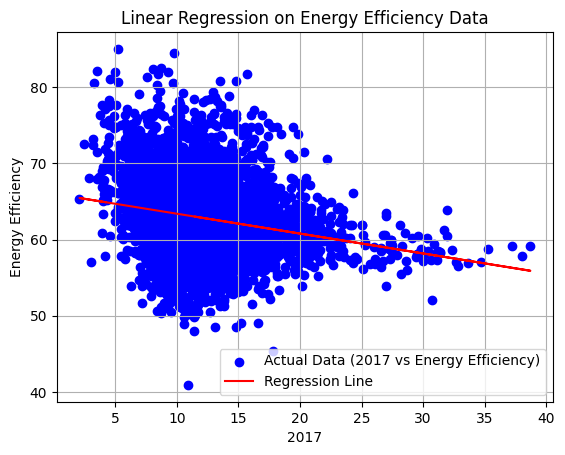

In [28]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color="blue", label="Actual Data (2017 vs Energy Efficiency)")
plt.plot(x, predictions, color="red", label="Regression Line")

# Add labels, title, and legend to the plot
plt.xlabel("2017")
plt.ylabel("Energy Efficiency")
plt.title("Linear Regression on Energy Efficiency Data")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()